# Dataset overview & Setup

# Dataset Information

Link: https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset?resource=download

The Iraq-Oncology Teaching Hospital/National Center for Cancer Diseases (IQ-OTH/NCCD) lung cancer dataset was collected in the above-mentioned specialist hospitals over a period of three months in fall 2019. It includes CT scans of patients diagnosed with lung cancer in different stages, as well as healthy subjects. IQ-OTH/NCCD slides were marked by oncologists and radiologists in these two centers. The dataset contains a total of 1190 images representing CT scan slices of 110 cases. These cases are grouped into three classes: normal, benign, and malignant. of these, 40 cases are diagnosed as malignant; 15 cases diagnosed with benign; and 55 cases classified as normal cases. The CT scans were originally collected in DICOM format. The scanner used is SOMATOM from Siemens. CT protocol includes: 120 kV, slice thickness of 1 mm, with window width ranging from 350 to 1200 HU and window center from 50 to 600 were used for reading. with breath hold at full inspiration. All images were de-identified before performing analysis. Written consent was waived by the oversight review board. The study was approved by the institutional review board of participating medical centers. Each scan contains several slices. The number of these slices range from 80 to 200 slices, each of them represents an image of the human chest with different sides and angles. The 110 cases vary in gender, age, educational attainment, area of residence and living status. Some of them are employees of the Iraqi ministries of Transport and Oil, others are farmers and gainers. Most of them come from places in the middle region of Iraq, particularly, the provinces of Baghdad, Wasit, Diyala, Salahuddin, and Babylon.

if you use this dataset you should cite the following articles:

1- Diagnosis of lung cancer based on CT scans using CNN
can be cited as :
(H. F. Al-Yasriy, M. S. Al-Husieny, F. Y. Mohsen, E. A. Khalil, and Z. S. Hassan, "Diagnosis of Lung Cancer Based on CT Scans Using CNN," IOP Conference Series: Materials Science and Engineering, vol. 928, 2020.)

2- Evaluation of SVM performance in the detection of lung cancer in marked CT scan dataset
can be cited as:
(H. F. Kareem, M. S. A.-Husieny, F. Y. Mohsen, E. A. Khalil, and Z. S. Hassan, “Evaluation of SVM performance in the detection
of lung cancer in marked CT scan dataset,” Indonesian Journal of Electrical Engineering and Computer Science, vol. 21, no. 3,
pp. 1731-1738, 2021, doi: 10.11591/ijeecs.v21.i3.pp1731-1738.)

3- The IQ-OTH/NCCD lung cancer dataset
can be cited as :
(alyasriy, hamdalla; AL-Huseiny, Muayed (2023), “The IQ-OTH/NCCD lung cancer dataset”, Mendeley Data, V4, doi: 10.17632/bhmdr45bh2.4)

## Import necessary libraries

In [ ]:
# import sys and general libs
import gc
import os
import timeit

In [ ]:
# import data handling tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for dataset splitting and shuffling
# import random
# import shutil

# for dataset handling
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
# for models
# import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import timm

## Check speed GPU and warmup CPU, GPU

In [ ]:
# device_name = tf.test.gpu_device_name()

In [ ]:
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found. Choose runtime GPU.')
# print(f"Found GPU at: {device_name}")

In [ ]:
# def gpu(image_inp):
#   with tf.device('/device:GPU:0'):
#     conv = tf.keras.layers.Conv2D(32, (3, 3))(image_inp)

# def cpu(image_inp):
#   with tf.device('/CPU:0'):
#     conv = tf.keras.layers.Conv2D(32, (3, 3))(image_inp)

# random_image_inp = tf.random.normal((100, 100, 100, 3))

# # Run once to warmup to timeit
# gpu(random_image_inp)
# cpu(random_image_inp)

# print("Time (s) to convolve over 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.")
# cpu_time = timeit.timeit(lambda: cpu(random_image_inp), number=10)
# gpu_time = timeit.timeit(lambda: gpu(random_image_inp), number=10)
# print("GPU:", gpu_time)
# print("CPU:", cpu_time)
# print(f"GPU speedup over CPU:{round(cpu_time/gpu_time)}x")

## Download unsplitted dataset for visualization, split if needed

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1mi4weypxSMVlEmKQ2cK-vmYIDdH0hbxw/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1mi4weypxSMVlEmKQ2cK-vmYIDdH0hbxw
From (redirected): https://drive.google.com/uc?id=1mi4weypxSMVlEmKQ2cK-vmYIDdH0hbxw&confirm=t&uuid=56890176-9553-4a7b-9812-428b371938cd
To: /content/The IQ-OTHNCCD lung cancer dataset.zip
100% 157M/157M [00:01<00:00, 79.5MB/s]


In [ ]:
!mkdir full-dataset

In [ ]:
!unzip -q "The IQ-OTHNCCD lung cancer dataset.zip" -d full-dataset

#### Divide dataset into test, train and evaluate sets

In [ ]:
# data_dir = 'dataset'
# train_dir = os.path.join(data_dir, 'train')
# test_dir = os.path.join(data_dir, 'test')
# val_dir = os.path.join(data_dir, 'val')


# transform = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

In [ ]:
# dataset = datasets.ImageFolder(data_dir, transform=transform)

# train_ratio = 0.7
# val_ratio = 0.15
# test_ratio = 0.15

# def split_dataset(dataset, train_ratio, val_ratio, test_ratio):
#     n_samples = len(dataset)
#     n_train = int(train_ratio * n_samples)
#     n_val = int(val_ratio * n_samples)
#     n_test = int(test_ratio * n_samples)

#     indices = list(range(n_samples))
#     random.shuffle(indices)

#     train_indices = indices[:n_train]
#     val_indices = indices[n_train:n_train+n_val]
#     test_indices = indices[n_train+n_val:]

#     return train_indices, val_indices, test_indices

# train_indices, val_indices, test_indices = split_dataset(dataset, train_ratio, val_ratio, test_ratio)

# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Move images to respective folders
# for i, (img_path, label) in enumerate(dataset.imgs):
#     if i in train_indices:
#         target_dir = train_dir
#     elif i in val_indices:
#         target_dir = val_dir
#     else:
#         target_dir = test_dir

#     label_dir = os.path.join(target_dir, dataset.classes[label])
#     os.makedirs(label_dir, exist_ok=True)

#     shutil.move(img_path, os.path.join(label_dir, os.path.basename(img_path)))

## Download the pre-split dataset (train, eval, test sets).

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1mzGSCYGO6XO_QiYWEBqb7t_DEt_tDlt8/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1mzGSCYGO6XO_QiYWEBqb7t_DEt_tDlt8
From (redirected): https://drive.google.com/uc?id=1mzGSCYGO6XO_QiYWEBqb7t_DEt_tDlt8&confirm=t&uuid=ec7a2baa-c048-499d-bab9-7dc5ddbc583a
To: /content/Splitted-IQ-OTHNCCD-lung-cancer.zip
100% 157M/157M [00:02<00:00, 73.3MB/s]


In [ ]:
!mkdir dataset

In [ ]:
!unzip -q Splitted-IQ-OTHNCCD-lung-cancer.zip -d dataset

In [ ]:
!ls

 dataset        sample_data			     'The IQ-OTHNCCD lung cancer dataset.zip'
 full-dataset   Splitted-IQ-OTHNCCD-lung-cancer.zip


# Implementation


## EDA

### Class for Image Processor

In [ ]:
class ImageProcessor:
  def __init__(self, data_dir: str, batch_size=32):
    self.data_dir = data_dir
    self.batch_size = batch_size
    self.train_name = 'train'
    self.val_name = 'val'
    self.test_name = 'test'
    self.train_loader = None
    self.val_loader = None
    self.test_loader = None
    self.train_dataset = None
    self.val_dataset = None
    self.test_dataset = None

  def visualize(self):
    src = os.listdir(self.data_dir)
    data = []
    y_plot = []
    for label in src:
      label_size = len(os.listdir(os.path.join(self.data_dir, label)))
      data.append([label, label_size])
      y_plot.append(label_size)

    # Sort to make the plot clearer
    data = sorted(data, key=lambda x: x[1], reverse=True)
    y_plot = sorted(y_plot, reverse=True)

    plt.figure(figsize=(6, 5))
    sns.barplot(x=[tup[0] for tup in data], y=y_plot, palette="rainbow") # or "cubehelix", choose colormap: https://matplotlib.org/stable/users/explain/colors/colormaps.html

    plt.title("Label distribution")
    plt.xlabel("Label")
    plt.ylabel("Number of images")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

  def load_splitted_dataset(self, transform=transforms.Compose([transforms.Resize(256),
                                                                transforms.CenterCrop(224),
                                                                transforms.ToTensor(),
                                                                ])):
    data_dir = self.data_dir
    train_dir = os.path.join(data_dir, self.train_name)
    test_dir = os.path.join(data_dir, self.test_name)
    val_dir = os.path.join(data_dir, self.val_name)

    self.train_dataset = datasets.ImageFolder(train_dir, transform=transform)
    self.val_dataset = datasets.ImageFolder(val_dir, transform=transform)
    self.test_dataset = datasets.ImageFolder(test_dir, transform=transform)

    batch_size = self.batch_size
    self.train_loader = DataLoader(self.train_dataset, batch_size=batch_size, shuffle=True)
    self.val_loader = DataLoader(self.val_dataset, batch_size=batch_size, shuffle=False)
    self.test_loader = DataLoader(self.test_dataset, batch_size=batch_size, shuffle=False)

  def view_sample_images_in_dataset(self, k=5):
    train_images, train_labels = next(iter(self.train_loader))[:k]
    val_images, val_labels = next(iter(self.val_loader))[:k]
    test_images, test_labels = next(iter(self.test_loader))[:]

    def display_images(images, labels, dataset_name):
        fig, axes = plt.subplots(1, 5, figsize=(15, 3))
        fig.suptitle(f"First 5 Images from {dataset_name} Set", fontsize=16)

        for i in range(5):
            axes[i].imshow(images[i].permute(1, 2, 0))
            axes[i].set_title(f"Label: {self.train_dataset.classes[labels[i]]}")
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

    display_images(train_images, train_labels, "Training")
    display_images(val_images, val_labels, "Validation")
    display_images(test_images, test_labels, "Test")

  def calculate_mean_std(self):
    if self.train_dataset is None or self.val_dataset is None or self.test_dataset is None:
        self.load_splitted_dataset()

    r_mean, g_mean, b_mean = 0.0, 0.0, 0.0
    r_std, g_std, b_std = 0.0, 0.0, 0.0
    num_pixels = 0

    for dataset_loader in [self.train_loader, self.val_loader, self.test_loader]:
        for images, _ in dataset_loader:
            images = images.numpy()
            for image in images:
                r, g, b = image[0, ...], image[1, ...], image[2, ...]
                r_mean += r.mean()
                g_mean += g.mean()
                b_mean += b.mean()
                r_std += r.std()**2
                g_std += g.std()**2
                b_std += b.std()**2
                num_pixels += r.size

    print(f"r mean: {r_mean}")
    print(f"g mean: {g_mean}")
    print(f"b mean: {b_mean}")
    print(f"r tsd: {r_std}")
    print(f"g tsd: {g_std}")
    print(f"b tsd: {b_std}")
    print(f"num pixels: {num_pixels}")
    r_mean /= num_pixels
    g_mean /= num_pixels
    b_mean /= num_pixels
    r_std = np.sqrt(r_std / num_pixels)
    g_std = np.sqrt(g_std / num_pixels)
    b_std = np.sqrt(b_std / num_pixels)

    mean = np.array([r_mean, g_mean, b_mean])
    std = np.array([r_std, g_std, b_std])

    return mean.tolist(), std.tolist()

### Visualize unsplitted dataset

<ipython-input-16-07a34adcd997>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[tup[0] for tup in data], y=y_plot, palette="rainbow") # or "cubehelix", choose colormap: https://matplotlib.org/stable/users/explain/colors/colormaps.html


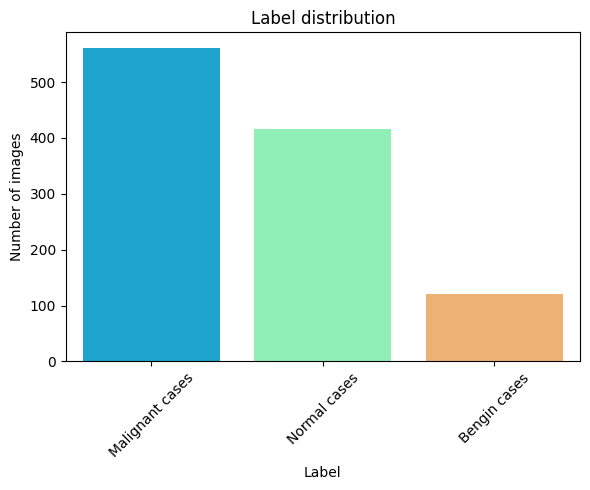

In [ ]:
dataset = ImageProcessor('/content/full-dataset/The IQ-OTHNCCD lung cancer dataset/')
dataset.visualize()

There are 100 more malignant cases than normal cases, and five times more than benign cases.

### Visualize splitted dataset

<ipython-input-16-07a34adcd997>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[tup[0] for tup in data], y=y_plot, palette="rainbow") # or "cubehelix", choose colormap: https://matplotlib.org/stable/users/explain/colors/colormaps.html


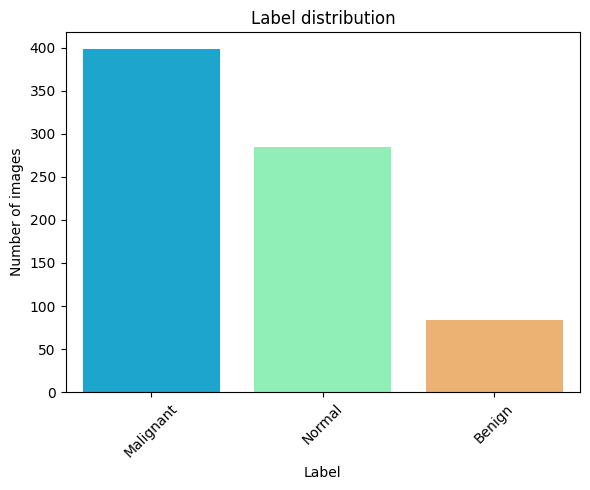

In [ ]:
dataset = ImageProcessor('/content/dataset/The IQ-OTHNCCD lung cancer dataset/train')
dataset.visualize()

<ipython-input-16-07a34adcd997>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[tup[0] for tup in data], y=y_plot, palette="rainbow") # or "cubehelix", choose colormap: https://matplotlib.org/stable/users/explain/colors/colormaps.html


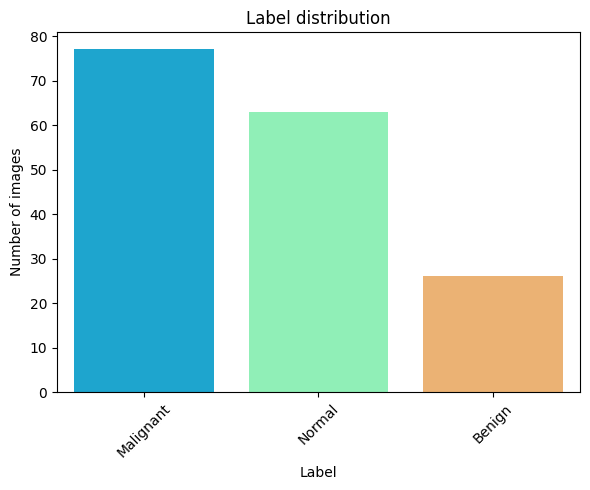

In [ ]:
dataset = ImageProcessor('/content/dataset/The IQ-OTHNCCD lung cancer dataset/test')
dataset.visualize()

Imbalance dataset => Loss putting more weights on label with more images

Regularization: simplify models, leading to small weights

<ipython-input-16-07a34adcd997>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[tup[0] for tup in data], y=y_plot, palette="rainbow") # or "cubehelix", choose colormap: https://matplotlib.org/stable/users/explain/colors/colormaps.html


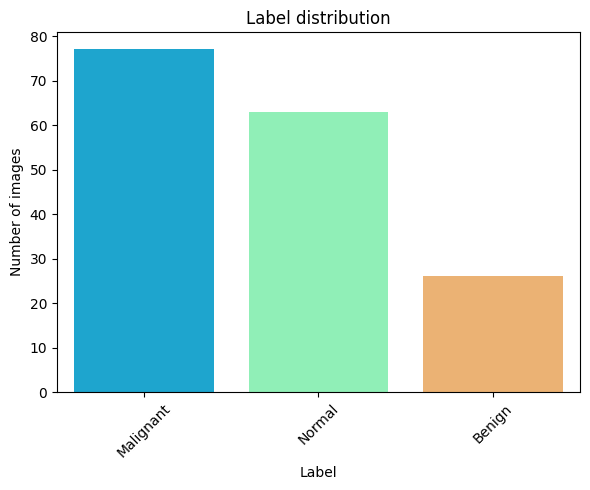

In [ ]:
dataset = ImageProcessor('/content/dataset/The IQ-OTHNCCD lung cancer dataset/test/')
dataset.visualize()

The distribution is maintained in train, evaluation and test set.

### Calculate mean and std of the dataset for "transform"

In [ ]:
full_dataset = ImageProcessor('/content/dataset/The IQ-OTHNCCD lung cancer dataset/')
mean_full_data, std_full_data = full_dataset.calculate_mean_std()
formatted_output = f"(mean={mean_full_data}, std={std_full_data})"
print(formatted_output)

r mean: 516.2581787109375
g mean: 516.2581787109375
b mean: 516.2581787109375
r tsd: 98.18547821044922
g tsd: 98.18547821044922
b tsd: 98.18547821044922
num pixels: 55043072
(mean=[9.379166840517428e-06, 9.379166840517428e-06, 9.379166840517428e-06], std=[0.001335587352514267, 0.001335587352514267, 0.001335587352514267])


## Load splitted dataset

In [ ]:
dataset = ImageProcessor('/content/dataset/The IQ-OTHNCCD lung cancer dataset/')
dataset.load_splitted_dataset()

### View the train, test, and eval dataset

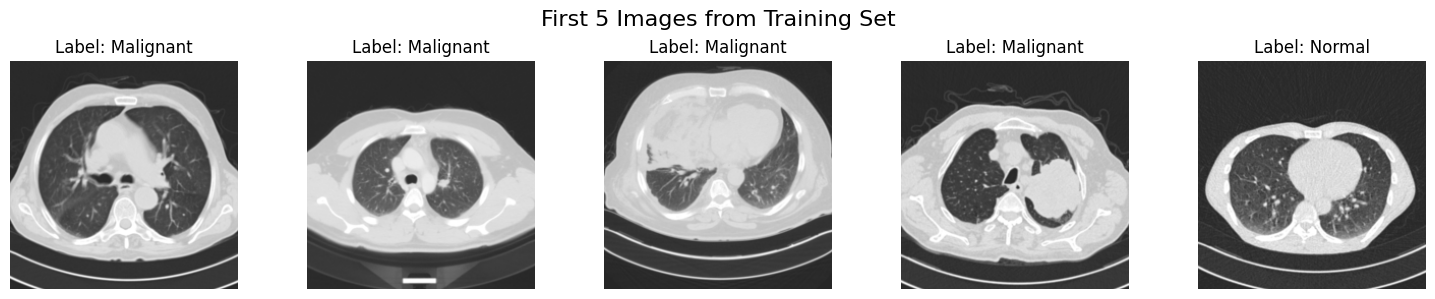

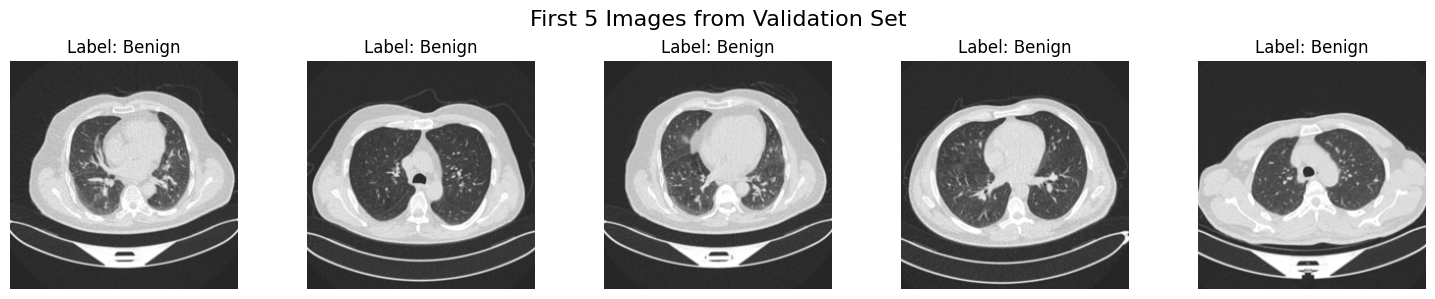

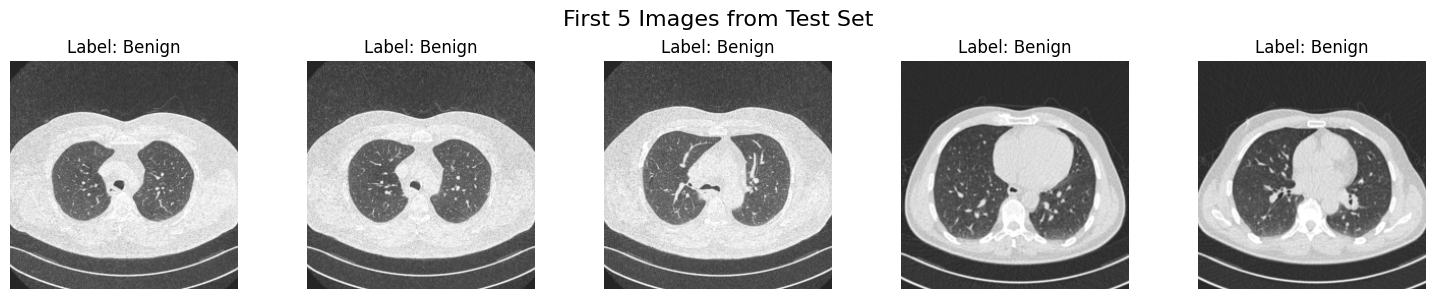

In [ ]:
dataset.view_sample_images_in_dataset()

## Load model

## Train and evaluate models on test dataset

In [ ]:
class ModelTrainer:
  def __init__(self, model_name, dataset, pretrained=True, lr=0.001, num_epochs=10):
      """
      Initializes the ModelTrainer. Uses the ImageProcessor to load data.

      Args:
          model_name (str): Name of the model (e.g., 'resnet18').
          image_processor: An instance of the ImageProcessor class.
          pretrained (bool, optional): Whether to use pretrained weights. Defaults to True.
          lr (float, optional): Learning rate. Defaults to 0.001.
          num_epochs (int, optional): Number of training epochs. Defaults to 10.
      """
      self.model = None
      self.model_name = model_name
      self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
      self.criterion = nn.CrossEntropyLoss()
      self.lr = lr
      self.num_epochs = num_epochs
      self.image_processor = dataset
      self.image_processor.load_splitted_dataset()

      self.best_val_acc = -1.0
      self.best_model_path = None

      try:
          self.model = timm.create_model(model_name, pretrained=pretrained)
          self.model.to(self.device)
          self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

      except RuntimeError as e:
          print(f"Error loading model '{model_name}': {e}")

  def train(self):
      for epoch in range(self.num_epochs):
          self.model.train()
          running_loss = 0.0

          train_total = 0
          train_correct = 0

          for inputs, labels in self.image_processor.train_loader:
              inputs, labels = inputs.to(self.device), labels.to(self.device)
              self.optimizer.zero_grad()
              outputs = self.model(inputs)
              loss = self.criterion(outputs, labels)
              loss.backward()
              self.optimizer.step()
              running_loss += loss.item()

              _, predicted = torch.max(outputs.data, 1)
              train_total += labels.size(0)
              train_correct += (predicted == labels).sum().item()

          self.model.eval()
          correct = 0
          total = 0
          with torch.no_grad():
              for inputs, labels in self.image_processor.val_loader:
                  inputs, labels = inputs.to(self.device), labels.to(self.device)
                  outputs = self.model(inputs)
                  _, predicted = torch.max(outputs.data, 1)
                  total += labels.size(0)
                  correct += (predicted == labels).sum().item()

          train_accuracy = 100 * train_correct / train_total
          val_accuracy = 100 * correct / total
          print(f"Epoch {epoch+1}/{self.num_epochs}, Train Loss: {running_loss/len(self.image_processor.train_loader):.4f}, "
                f"Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%")

          if val_accuracy > self.best_val_acc:
              self.best_val_acc = val_accuracy
              self.best_model_path = self.save_model(self.model, f"{self.model_name}_best_model")

      self.save_model(self.model, f"{self.model_name}_final_model")
      print(f"Best Validation Accuracy: {self.best_val_acc:.2f}%")

      return self.model

  def save_model(self, model, model_name):
      model_path = f"{model_name}.pth"
      torch.save(model.state_dict(), model_path)
      print(f"Model saved to {model_path}")

  def evaluate(self):
      print(f"Evaluating {self.model_name} on test set...")
      if self.model is None:
          raise ValueError("Train the model first!")

      self.model.eval()
      correct = 0
      total = 0
      with torch.no_grad():
          for inputs, labels in self.image_processor.test_loader:
              inputs, labels = inputs.to(self.device), labels.to(self.device)
              outputs = self.model(inputs)
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

      accuracy = 100 * correct / total
      print(f'Test Accuracy of {self.model_name}: {accuracy:.2f}%')

In [ ]:
dataset = ImageProcessor('/content/dataset/The IQ-OTHNCCD lung cancer dataset/')

transform = transforms.Compose([
    transforms.Resize(480),
    transforms.CenterCrop(480),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean_full_data, std=std_full_data)
])
dataset.load_splitted_dataset(transform)

# https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_v2_s.html#torchvision.models.efficientnet_v2_s
model_name = 'tf_efficientnetv2_s'
trainer = ModelTrainer(model_name, dataset)
trainer.train()

trainer.evaluate()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/86.5M [00:00<?, ?B/s]

Epoch 1/10, Train Loss: 0.9368, Train Accuracy: 80.83%, Val Accuracy: 78.05%
Model saved to tf_efficientnetv2_s_best_model.pth
Epoch 2/10, Train Loss: 0.1232, Train Accuracy: 96.09%, Val Accuracy: 96.95%
Model saved to tf_efficientnetv2_s_best_model.pth
Epoch 3/10, Train Loss: 0.0792, Train Accuracy: 97.52%, Val Accuracy: 95.12%
Epoch 4/10, Train Loss: 0.0322, Train Accuracy: 99.09%, Val Accuracy: 98.78%
Model saved to tf_efficientnetv2_s_best_model.pth
Epoch 5/10, Train Loss: 0.0263, Train Accuracy: 99.22%, Val Accuracy: 98.78%
Epoch 6/10, Train Loss: 0.0424, Train Accuracy: 98.17%, Val Accuracy: 98.78%
Epoch 7/10, Train Loss: 0.0126, Train Accuracy: 99.74%, Val Accuracy: 100.00%
Model saved to tf_efficientnetv2_s_best_model.pth
Epoch 8/10, Train Loss: 0.0649, Train Accuracy: 98.04%, Val Accuracy: 96.95%
Epoch 9/10, Train Loss: 0.0806, Train Accuracy: 97.26%, Val Accuracy: 89.63%
Epoch 10/10, Train Loss: 0.0472, Train Accuracy: 98.57%, Val Accuracy: 97.56%
Model saved to tf_efficientn

In [ ]:
gc.collect()
torch.cuda.empty_cache()

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean_full_data, std=std_full_data)
])
dataset.load_splitted_dataset(transform)

# https://pytorch.org/vision/stable/models/generated/torchvision.models.regnet_x_3_2gf.html#torchvision.models.RegNet_X_3_2GF_Weights
model_name = 'regnetx_032'
trainer = ModelTrainer(model_name, dataset)

trainer.train()

trainer.evaluate()

model.safetensors:   0%|          | 0.00/61.5M [00:00<?, ?B/s]

Epoch 1/10, Train Loss: 0.9729, Train Accuracy: 82.01%, Val Accuracy: 92.07%
Model saved to regnetx_032_best_model.pth
Epoch 2/10, Train Loss: 0.1355, Train Accuracy: 95.44%, Val Accuracy: 96.34%
Model saved to regnetx_032_best_model.pth
Epoch 3/10, Train Loss: 0.0499, Train Accuracy: 98.04%, Val Accuracy: 82.93%
Epoch 4/10, Train Loss: 0.0624, Train Accuracy: 98.44%, Val Accuracy: 80.49%
Epoch 5/10, Train Loss: 0.0708, Train Accuracy: 97.65%, Val Accuracy: 98.17%
Model saved to regnetx_032_best_model.pth
Epoch 6/10, Train Loss: 0.0278, Train Accuracy: 99.22%, Val Accuracy: 98.17%
Epoch 7/10, Train Loss: 0.0354, Train Accuracy: 98.57%, Val Accuracy: 95.73%
Epoch 8/10, Train Loss: 0.0533, Train Accuracy: 97.39%, Val Accuracy: 93.90%
Epoch 9/10, Train Loss: 0.0787, Train Accuracy: 97.26%, Val Accuracy: 77.44%
Epoch 10/10, Train Loss: 0.0383, Train Accuracy: 98.96%, Val Accuracy: 99.39%
Model saved to regnetx_032_best_model.pth
Model saved to regnetx_032_final_model.pth
Best Validation Ac

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean_full_data, std=std_full_data)
])
dataset.load_splitted_dataset(transform)

# https://pytorch.org/vision/stable/models/generated/torchvision.models.mobilenet_v3_large.html#torchvision.models.MobileNet_V3_Large_Weights
model_name = 'mobilenetv3_large_100'
trainer = ModelTrainer(model_name, dataset)

trainer.train()

trainer.evaluate()

model.safetensors:   0%|          | 0.00/22.1M [00:00<?, ?B/s]

Epoch 1/10, Train Loss: 0.8025, Train Accuracy: 79.79%, Val Accuracy: 81.71%
Model saved to mobilenetv3_large_100_best_model.pth
Epoch 2/10, Train Loss: 0.0880, Train Accuracy: 96.48%, Val Accuracy: 93.90%
Model saved to mobilenetv3_large_100_best_model.pth
Epoch 3/10, Train Loss: 0.0795, Train Accuracy: 97.52%, Val Accuracy: 96.95%
Model saved to mobilenetv3_large_100_best_model.pth
Epoch 4/10, Train Loss: 0.0717, Train Accuracy: 96.87%, Val Accuracy: 95.12%
Epoch 5/10, Train Loss: 0.0577, Train Accuracy: 97.91%, Val Accuracy: 98.17%
Model saved to mobilenetv3_large_100_best_model.pth
Epoch 6/10, Train Loss: 0.0199, Train Accuracy: 99.35%, Val Accuracy: 98.17%
Epoch 7/10, Train Loss: 0.0058, Train Accuracy: 99.87%, Val Accuracy: 98.17%
Epoch 8/10, Train Loss: 0.0037, Train Accuracy: 99.87%, Val Accuracy: 99.39%
Model saved to mobilenetv3_large_100_best_model.pth
Epoch 9/10, Train Loss: 0.0005, Train Accuracy: 100.00%, Val Accuracy: 99.39%
Epoch 10/10, Train Loss: 0.0004, Train Accurac